In [1]:
import sys
import os
import toml

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import numpy as np
import json
import scipy.optimize as SciOpt
from scipy.special import rel_entr
from tqdm.notebook import tqdm
from copy import deepcopy

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
plt.rcParams.update(
    {
        # "text.usetex": True,
        "text.latex.preamble": r"\usepackage{bm}",
        # Enforce default LaTeX font.
        "font.family": "serif",
        "mathtext.fontset": "dejavuserif",
    }
)

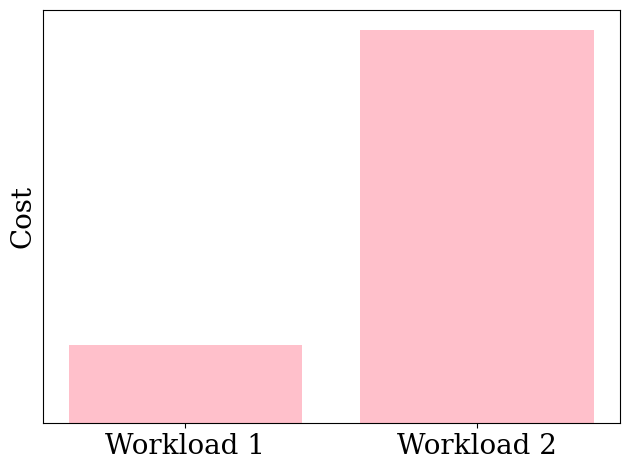

In [2]:
fig, ax = plt.subplots(tight_layout=True)
labels = ['Workload 1', 'Workload 2']
width = 0.4
cost_nom = [1, 5]
# cost_rob = [2, 3]
# xtick = np.arange(len(labels))
xtick = [0, 0.5]
# rects1 = ax.bar(xtick - width / 2, cost_nom, width=width, label='Nominal', color='pink', hatch='.')
rects1 = ax.bar(xtick, cost_nom, width=width, label='Nominal', color='pink', align='center')
# rects2 = ax.bar(xtick + width / 2, cost_rob, width=width, label='Robust', color='tab:orange', hatch='x')

ax.set_yticks([])
ax.set_ylabel('Cost', fontsize=20)
ax.set_xticks(xtick, labels, fontsize=20)
# ax.legend(fontsize=24)

fig.tight_layout()

plt.show()

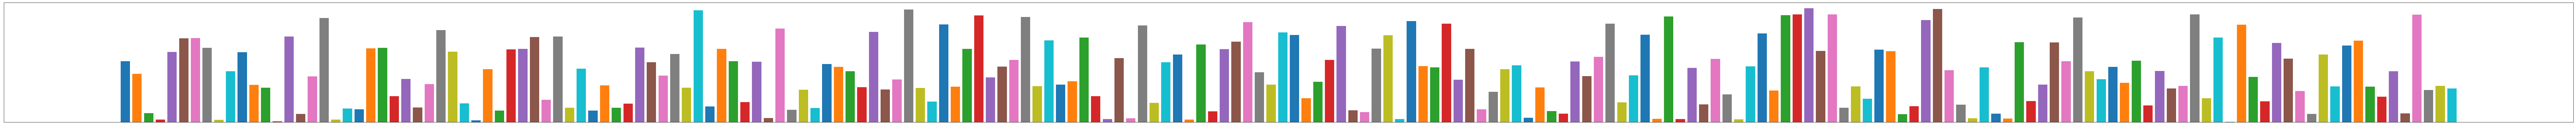

In [3]:
fig, ax = plt.subplots(figsize=(100, 5), tight_layout=True)
labels = ['Workload 1', 'Workload 2']
width = 0.1
cost_nom = np.random.rand(200)
xtick = list(range(len(cost_nom)))
cmap = plt.cm.tab10
colors = cmap(np.arange(len(xtick)) % cmap.N)
rects1 = ax.bar(xtick, cost_nom, align='center', color=colors)

ax.set_yticks([])
ax.set_xticks([])
# ax.set_ylabel('Cost', fontsize=20)

fig.tight_layout()

plt.show()
fig.savefig('tmp.pdf')

In [5]:
df = pd.read_parquet('/data/train-data/levelcost-parquet/levelcost-0000.parquet')
df.describe()

,z0_cost,z1_cost,q_cost,w_cost,z0,z1,q,w,h,T
count,"262,144.00","262,144.00","262,144.00","262,144.00","262,144.00","262,144.00","262,144.00","262,144.00","262,144.00","262,144.00"
mean,0.07,0.26,0.78,3.71,0.25,0.25,0.25,0.25,4.95,25.47
std,0.13,0.20,0.79,3.45,0.19,0.19,0.19,0.19,2.86,13.85
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
25%,0.01,0.09,0.26,1.13,0.09,0.09,0.09,0.09,2.47,13.00
50%,0.02,0.21,0.59,2.67,0.21,0.21,0.21,0.21,4.95,25.00
75%,0.08,0.38,1.08,5.26,0.37,0.37,0.37,0.37,7.43,38.00
max,3.20,2.11,13.25,28.25,0.99,0.99,0.97,0.99,9.90,49.00


In [9]:
df

,z0_cost,z1_cost,q_cost,w_cost,z0,z1,q,w,h,T
0,0.01,0.18,2.10,1.32,0.21,0.18,0.42,0.19,8.33,6
1,0.02,0.11,0.21,10.01,0.34,0.11,0.09,0.46,5.91,43
2,0.09,0.56,0.08,3.90,0.10,0.54,0.03,0.33,0.64,21
3,0.01,0.02,0.16,8.82,0.04,0.02,0.05,0.88,3.93,15
4,0.23,0.06,0.62,3.47,0.31,0.06,0.21,0.42,1.32,12
...,...,...,...,...,...,...,...,...,...,...
262139,0.37,0.10,0.63,2.06,0.46,0.09,0.22,0.23,1.01,14
262140,0.04,0.73,0.46,0.27,0.12,0.71,0.14,0.03,3.03,11
262141,0.20,0.45,0.29,2.52,0.28,0.44,0.14,0.13,0.92,42
262142,0.01,0.17,0.66,0.20,0.59,0.17,0.23,0.01,9.44,38
